# LeNet-5 (1998, Yan LeCunn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation

from tensorflow.keras.datasets import mnist
np.random.seed(101)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
X_train_scaled = X_train / 255.
X_test_scaled = X_test / 255.

In [4]:
X_train_scaled = np.expand_dims(X_train_scaled, axis=3)
X_test_scaled = np.expand_dims(X_test_scaled, axis=3)

In [5]:
X_train_scaled.shape
X_test_scaled.shape

(10000, 28, 28, 1)

In [6]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(128)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(128)

In [8]:
# LeNet
model = tf.keras.Sequential()

model.add(Conv2D(6, kernel_size=5, padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Conv2D(16, kernel_size=5, padding="valid"))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Flatten())

model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0

In [10]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
469/469 [==============================] - 8s 17ms/step - loss: 0.3841 - accuracy: 0.8881 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1199 - accuracy: 0.9636 - val_loss: 0.0887 - val_accuracy: 0.9731
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0787 - accuracy: 0.9758 - val_loss: 0.0567 - val_accuracy: 0.9815
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0608 - accuracy: 0.9819 - val_loss: 0.0534 - val_accuracy: 0.9814
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0537 - val_accuracy: 0.9827


In [13]:
score = model.evaluate(test_ds, verbose=0)

In [14]:
print("Test Score ", score[0])
print("Test Accuracy ", score[1])

Test Score  0.05366458674108822
Test Accuracy  0.9827


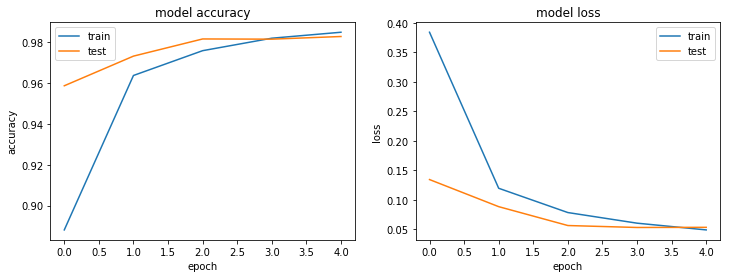

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [16]:
y_pred = model.predict_classes(X_test_scaled)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[ 974,    1,    0,    0,    0,    3,    1,    1,    0,    0],
       [   0, 1133,    0,    0,    0,    0,    0,    2,    0,    0],
       [   0,    3, 1016,    3,    1,    0,    1,    8,    0,    0],
       [   0,    0,    0, 1007,    0,    2,    0,    1,    0,    0],
       [   0,    1,    3,    0,  971,    0,    1,    1,    0,    5],
       [   1,    0,    0,   11,    0,  878,    1,    0,    0,    1],
       [   6,    4,    0,    0,    3,    9,  935,    0,    1,    0],
       [   1,    2,    3,    0,    0,    0,    0, 1017,    1,    4],
       [   2,    1,    1,   34,    2,    8,    0,    5,  914,    7],
       [   4,    3,    0,    6,    6,    2,    0,    5,    1,  982]],
      dtype=int64)

Test Accuracy : 0.9827


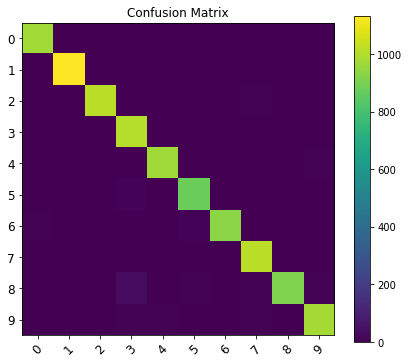

In [19]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(7,6))
plt.imshow(confusion_matrix(y_test, y_pred))
plt.colorbar()
plt.xticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.yticks(np.arange(10), list(range(10)), fontsize=12)
plt.title('Confusion Matrix')

print('Test Accuracy :', accuracy_score(y_test, y_pred))